# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [ ]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

In [ ]:
def filter_median(I, window_size):
    height, width, channels = I.shape
    result = np.zeros((height, width, channels), dtype=np.uint8)
    for i in range(window_size // 2, height - window_size // 2):
        for j in range(window_size // 2, width - window_size // 2):
            window = I[i - window_size // 2:i + window_size // 2 + 1, j - window_size // 2:j + window_size // 2 + 1].astype(np.int32)
            distances = np.zeros((window_size, window_size))
            for row in range(window_size):
                for col in range(window_size):
                    distances[row, col] = np.sqrt(np.square(window - window[row, col])).sum()

            min_ind = np.argmin(distances)
            min_i, min_j = np.unravel_index(min_ind, (window_size, window_size))
            result[i, j] = window[min_i, min_j]
    
    return result

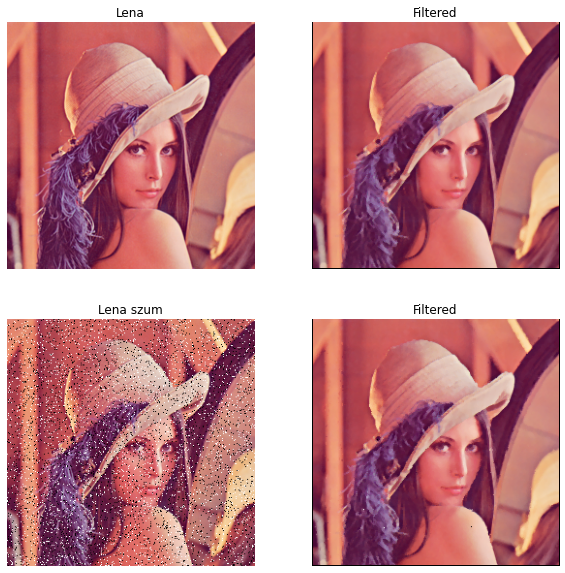

In [ ]:
I1 = cv2.imread("lenaRGB.png")
I2 = cv2.imread("lenaRGBSzum.png")
I1 = cv2.cvtColor(I1, cv2.COLOR_BGR2RGB)
I2 = cv2.cvtColor(I2, cv2.COLOR_BGR2RGB)

result1 = filter_median(I1, 3)
result2 = filter_median(I2, 3)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(10, 10)
axs[0, 0].imshow(I1)
axs[0, 0].axis("off")
axs[0, 0].set_title("Lena")
axs[0, 1].imshow(result1)
axs[0, 1].axis("off")
axs[0, 1].set_title("Filtered")
axs[1, 0].imshow(I2)
axs[1, 0].axis("off")
axs[1, 0].set_title("Lena szum")
axs[1, 1].imshow(result2)
axs[1, 1].axis("off")
axs[1, 1].set_title("Filtered")
plt.show()